In [1]:
from __future__ import annotations

import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import default_plot as dp

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"

In [2]:
L = np.pi
m = 1
test_states = list(range(0, 4))
test_amps = np.ones(4)
test_gamma = 10

test_state_normal = pib.Particle_in_Box_State("symmetric", L, m, test_states, test_amps, test_gamma)
test_state_immediate = pib.Particle_in_Box_Immediate_Mode("symmetric", L, m, test_states, test_amps, test_gamma)

adding state(s):  [0, 1, 2, 3]
current config:  [0, 1, 2, 3]
adding state(s):  [0, 1, 2, 3]
current config:  [0, 1, 2, 3]


'\nf = open("video_test.html", \'w\')\nf.write(dp.Multi_Plot(p1, p2, p3, p4).animate(20, 5, 1).to_jshtml())\nf.close()\n#dp.Multi_Plot(p1, p2, p3, p4).animate(20, 5, 1).to_jshtml()\n'

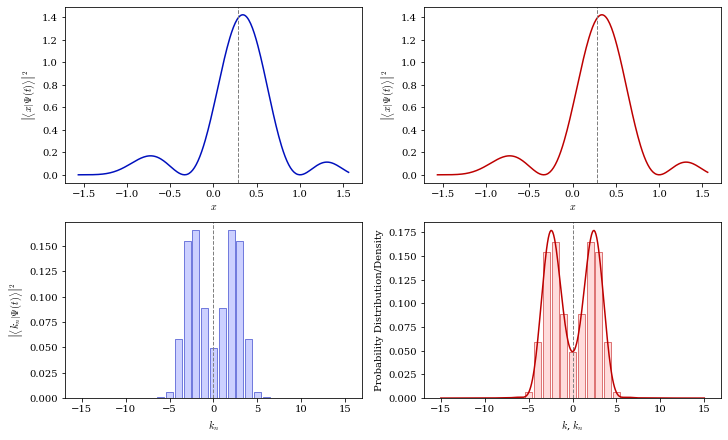

In [4]:
from colorsys import *

fig = plt.figure(constrained_layout=True, figsize=(10, 6))
gs = fig.add_gridspec(nrows=2, ncols=2)
p1 = dp.Position_Space_Plot(test_state_normal, fig, gs, [0,0])
p2 = dp.Position_Space_Plot(test_state_immediate, fig, gs, [0,1])
p3 = dp.Discrete_Momentum_Space_Plot(test_state_normal, fig, gs, [1,0])
p4 = dp.Momentum_Space_Plot(test_state_immediate, fig, gs, [1,1])
p1.expectation_value = True
p2.expectation_value = True
p3.expectation_value = True
p4.expectation_value = True

p2._light_color = hls_to_rgb(0, 93/100, 100/100)
p2._dark_color = hls_to_rgb(0, 37/100, 100/100)
p4._light_color = hls_to_rgb(0, 93/100, 100/100)
p4._dark_color = hls_to_rgb(0, 37/100, 100/100)

p3._light_color = p3._old_light_color

dp.Multi_Plot(p1, p2, p3, p4).plot(0)

"""
f = open("video_test.html", 'w')
f.write(dp.Multi_Plot(p1, p2, p3, p4).animate(20, 5, 1).to_jshtml())
f.close()
#dp.Multi_Plot(p1, p2, p3, p4).animate(20, 5, 1).to_jshtml()
"""

In [ ]:
L = np.pi
m = 1
test_states = [0, 1, 2, 3]
test_amps = [1, 1, 1, 1]
test_gamma = -1

test_state_analytic = pib.Particle_in_Box_State("symmetric", L, m, test_states, test_amps, test_gamma)
test_state_nummeric = pib.Particle_in_Box_State("symmetric_nummeric", L, m, test_states, test_amps, test_gamma)

In [ ]:
# Test Ehrenfest
theta = 3*np.pi
gamma = -5
test_state_analytic.theta = theta
test_state_nummeric.theta = theta
test_state_analytic.gamma = gamma
test_state_nummeric.gamma = gamma
dp.Expectation_Value_Plot(test_state_nummeric).plot(np.linspace(0, 5, 300))

In [ ]:
t = 0.5

fig = plt.figure(figsize=(8,4))
test_state_analytic.theta = 0
momentum_plot = dp.Momentum_Space_Plot(test_state_analytic, fig)
momentum_plot.set_n_bound(10)
momentum_plot.expectation_value = True
momentum_plot.plot(t)


fps = 10
time = 10
num_frames = fps*time

def animframe(i):
    test_state_analytic.theta = i/num_frames*2*np.pi
    momentum_plot.update()
    k_ev = momentum_plot.k_exp_val(t)
    momentum_plot.k_exp_line.set_data([k_ev, k_ev], [0, 1])
    for bar, h, pos in zip(momentum_plot.k_bars, np.abs(momentum_plot.new_k_space_wavefunc(momentum_plot.n, t))**2, momentum_plot.kn):
        bar.set_height(h)
        bar.set_x(pos - bar.get_width()/2)
    return list(momentum_plot.k_bars) + [momentum_plot.k_exp_line] + momentum_plot.k_lines

anim = FuncAnimation(fig, animframe, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
anim

In [ ]:
expectation_value_plot = dp.Expectation_Value_Plot(test_state_nummeric)

T = 11
eps = 0.075
fps = 21
num_frames = fps*T

test_state_nummeric.gamma = np.tan(-np.pi/2+eps)
test_state_nummeric.case = "symmetric_nummeric"

test_state_nummeric.reset()
test_state_nummeric.add_state([0, 1, 2, 3], [1, 1, 1, 1])

time = np.linspace(0, 5, 500)

expectation_value_plot.axis.set_ylim([-1.5, 1.5])
expectation_value_plot.plot(time)
text = expectation_value_plot.axis.text(4, -1, r"$\gamma$: " + str(round(test_state_nummeric.gamma)), animated=True)

eneries = test_state_nummeric.energy_space_wavefunction.energies
energy_texts = "states | energies: \n"
for i in range(test_state_nummeric._sp.num_energy_states):
    energy_texts += str(test_state_nummeric._sp.energy_states[i]) + " | " +str(round(eneries[i], 4)) + "\n"

energy_text = expectation_value_plot.axis.text(2, -1.5, energy_texts, animated=True)
expectation_value_plot.axis.legend(loc="lower left")


def animate_frame(i):
    test_state_nummeric.gamma = np.tan(-np.pi/2+eps + (i/fps)*(np.pi-2*eps)/T)
    #test_state_nummeric.gamma = (-2/test_state_nummeric.L - eps) + (i/fps)*(2*eps/T) 

    expectation_value_plot.update()
    text.set_text(r"$\gamma$: " + str(round(test_state_nummeric.gamma, 4)))

    energy_texts = "states | energies: \n"
    for i in range(test_state_nummeric._sp.num_energy_states):
        energy_texts += str(test_state_nummeric._sp.energy_states[i]) + " | " +str(round(eneries[i], 4)) + "\n"
    energy_text.set_text(energy_texts)


    expectation_value_plot.x_exp_line[0].set_data(time, test_state_nummeric.x_space_expectation_value(time))
    expectation_value_plot.k_exp_line[0].set_data(time, test_state_nummeric.new_k_space_expectation_value(time))
    expectation_value_plot.x_exp_deriv_line[0].set_data(time, test_state_nummeric.m * test_state_nummeric.x_space_expectation_value_derivative(time))

    return expectation_value_plot.x_exp_line + expectation_value_plot.k_exp_line + expectation_value_plot.x_exp_deriv_line

anim = FuncAnimation(expectation_value_plot.fig, animate_frame, frames=int(num_frames), interval=int(1/fps*1000), blit=True)



In [ ]:
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, ncols=1)
test_state_nummeric.reset()
test_state_nummeric.add_state([0, 1, 2],[1, 1, 1])
test_state_nummeric.gamma = -1
momentum_plot = dp.Momentum_Space_Plot(test_state_nummeric, fig, gs, [1,0])
position_plot = dp.Position_Space_Plot(test_state_nummeric, fig, gs, [0,0])
momentum_plot.expectation_value = True
position_plot.expectation_value = True
momentum_plot.axis.set_ylim([0, 0.5])
momentum_plot.set_n_bound(10)
dp.Multi_Plot(position_plot, momentum_plot).animate(20, 50, 3)

In [ ]:
gamma = 10
L = np.pi
m = 1
states = [1,2,3,4,5,6]
amps = [1,0.5,0.25,0.125,0.1,0.1]


myState = pib.Particle_in_Box_State("symmetric", L, m, states, amps, gamma)
myState.case = "dirichlet_neumann"

myState.x_space_wavefunction(L/2, 0)

In [ ]:
myState = pib.Particle_in_Box_State("dirichlet", np.pi, 1, [1,2,3,4], [1,1,1,1])

In [ ]:
fig = plt.figure(constrained_layout = True, figsize=(6,5))
gs = fig.add_gridspec(nrows=2, ncols=1)

myState.case = "dirichlet_neumann"
position_plot = dp.Position_Space_Plot(myState, fig, gs, [0,0])
momentum_plot = dp.Momentum_Space_Plot(myState, fig, gs, [1,0])
momentum_plot.set_n_bound(15)
momentum_plot.axis.set_ylim([0, 0.5])


position_plot.expectation_value = True
momentum_plot.expectation_value = True

combined_plot = dp.Multi_Plot(position_plot, momentum_plot)
combined_plot.animate(20, 3, 1)
#myState.energy_space_wavefunction.energies

In [ ]:
carpet_plot = dp.Carpet_Plot(myState)
carpet_plot.x_interval = [-2, 2]

myState.reset()
myState.add_state([2,3], [1,1])
myState.m = 1
myState.case = "dirichlet"

carpet_plot.x_res = 150
time = np.linspace(0, 5, 50)
carpet_plot.plot(time)


In [ ]:
testState = pib.Particle_in_Box_State("symmetric", np.pi, 1, [0, 1, 2, 3], [1, 1, 1, 1], -2)
expectation_value_plot = dp.Expectation_Value_Plot(testState)
time = np.linspace(0, 5, 300)
expectation_value_plot.plot(time)

In [25]:
4.5*0.05

0.225

adding state(s):  []
current config:  []
adding state(s):  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
current config:  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


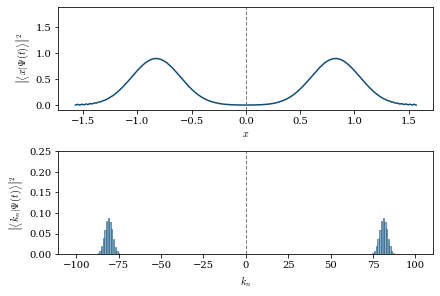

In [49]:
# Gaussian Playground
import Special_States as special

case = "dirichlet"
L = np.pi
m = 1
a = L/10
l_0 = 80
l_range = 40
gaussian = special.Bouncing_Gaussian(case, L, m, l_0, l_range, a)

T = ((4*m*L**2)/np.pi)

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1)
gaussian_pos = dp.Position_Space_Plot(gaussian, fig, gs, [0,0])
gaussian_pos.set_resolution(5000)
gaussian_momentum = dp.Discrete_Momentum_Space_Plot(gaussian, fig, gs, [1,0])
gaussian_momentum.set_resolution(1000)

gaussian_momentum.expectation_value = True
gaussian_pos.expectation_value = True

gaussian_plot = dp.Multi_Plot(gaussian_pos, gaussian_momentum)
gaussian_momentum.set_n_bound(100)
gaussian_momentum.axis.set_ylim([0, 0.25])
gaussian_pos.axis.set_ylim([-0.08979356106230174, 1.885664782314236])
gaussian_plot.plot(T/4*(1-0.00325))

#gaussian_plot.animate(20, 1, 0.05)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.animation import FuncAnimation

def approx_sum(N, L, x):
    out = 0
    for n in range(-N, N+1):
        out += np.exp(-1j*n*np.pi*x/L)
    
    return out

fps = 10
time = 10
num_frames = time*fps


x = np.linspace(0, 1, 1000)
"""
fig = plt.figure()
lines = plt.plot(x, approx_sum(100,x)*np.cos(x))
def anim(i):
    lines[0].set_data(x, approx_sum(i, x)*np.cos(x))
    return lines
"""
L = 2.1
#anim = FuncAnimation(fig, anim, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
quad(lambda x: approx_sum(500, L, x)*(x**2+1), 0, 1, limit=500)

In [ ]:
32**2